<a href="https://colab.research.google.com/github/aditya-shriwastava/colab-notebooks/blob/master/visual_odometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Docs

## Track Progress

### Day 1
#### TODO
- Understand ORB feature detector.
    (image) --|ORB|--> keypoints & descriptor
#### Done
ORB: (Oriented FAST) + (Rotated BRIEF)

- Understood how FAST and BRIEF works
- Understood modification of FAST in ORB
- Used ORB from cv2 to detect and display keypoints and Understood the mapping
  between input and output to ORB.

### Day 2
#### TODO
- Understand the ORB descriptor given the keypoint.
- And verify it with the cv2 ORB implementation.
- Feature matching, RENSAC and vo with ORB.
#### Done
- Understood ORB detector and descriptor and verified it with cv2 implementation.
- Understood brute force feature matchinga and verified with cv2.

### Day 3
#### TODO
- Read Tutorial 1:
    - Formulation of the VO Problem
    - Camera Modeling and Calibration
    - Motion Estimation
#### Done
- Understood Formulation of the VO Problem, Camera Modeling and Calibration.
- Stuck at Motion Estimation (What is Fundamental and Essential Matrices?)

### Day 4
#### TODO
- Understand Essential and Fundamental Matrices.
- Read DF-VO: What Should Be Learnt for Visual Odometry?
- Use RANSAC to obtain corrospending ORB features in image pair.

#### Done
- Understood Essential and Fundamental Matrices.

### Day 5
#### TODO
- Use corrospending ORB features in image pair and calibration matrix to obtain essential matrix.

## README

### Visual Odometry

(Camera data stream) --|Visual Odometry|--> (Camera Pose over time)

**Approach:** ORB Feature based Monocular Visual Odometry

**Dataset:** [ICL Dataset](https://peringlab.org/lmdata/)

#### Reference
1. [geohotz twitchslam](https://github.com/geohot/twitchslam)
2. [ORB: An efficient alternative to SIFT or SURF](https://github.com/commaai/rednos://ieeexplore.ieee.org/abstract/document/6126544)
3. [Introduction to ORB (Oriented FAST and Rotated BRIEF): Medium Post](https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf)
4. [SVO: Fast Semi-Direct Monocular Visual Odometry](https://www.zora.uzh.ch/id/eprint/125453/1/ICRA14_Forster.pdf)
5. Visual Odometry Tutorial
    2. [Visual Odometry (Part 1): The First 30 Years and Fundamentals](https://www.alaakhamis.org/teaching/SPC418/reading/Visual%20odometry.pdf)
    3. [Visual Odometry (Part 2): Matching, Robustness, Optimization, and Applications](https://www.zora.uzh.ch/id/eprint/71030/1/Fraundorfer_Scaramuzza_Visual_odometry.pdf)

# Main

In [ ]:
#@title Download deer_robot dataset
!wget https://www.doc.ic.ac.uk/~wl208/lmdata/deer_robot.zip
!unzip  deer_robot.zip >/dev/null

--2021-12-20 04:53:54--  https://www.doc.ic.ac.uk/~wl208/lmdata/deer_robot.zip
Resolving www.doc.ic.ac.uk (www.doc.ic.ac.uk)... 146.169.13.6
Connecting to www.doc.ic.ac.uk (www.doc.ic.ac.uk)|146.169.13.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 615030528 (587M) [application/zip]
Saving to: ‘deer_robot.zip’

deer_robot.zip      100%[===================>] 586.54M  1.49MB/s    in 6m 44s  

2021-12-20 05:00:39 (1.45 MB/s) - ‘deer_robot.zip’ saved [615030528/615030528]



In [ ]:
#@title imports
import os

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#@title deer_robot dataset utils

imgs_dir = "./deer_robot/cam0/data"
metadata_file = "./deer_robot/cam0/data.csv" 

def load_metadata():
    with open(metadata_file, 'r') as fd:
        metadata = fd.readlines()

    imgs_file = [
        line.split(',')[1][:-1] for line in metadata[1:]
    ]
    imgs_path = [os.path.join(imgs_dir, f) for f in imgs_file]
    timestamps = [float(line.split(',')[0])/1e9 for line in metadata[1:]]
    return imgs_path, timestamps

def load_batch(start, size):
    imgs_path, timestamps = load_metadata()
    imgs = np.array([
        cv2.imread(img_path) for img_path in imgs_path[start:start+size]
    ])
    return imgs, timestamps[start:start+size]

def load(index):
    imgs_path, timestamps = load_metadata()
    return cv2.imread(imgs_path[index]), timestamps[index]

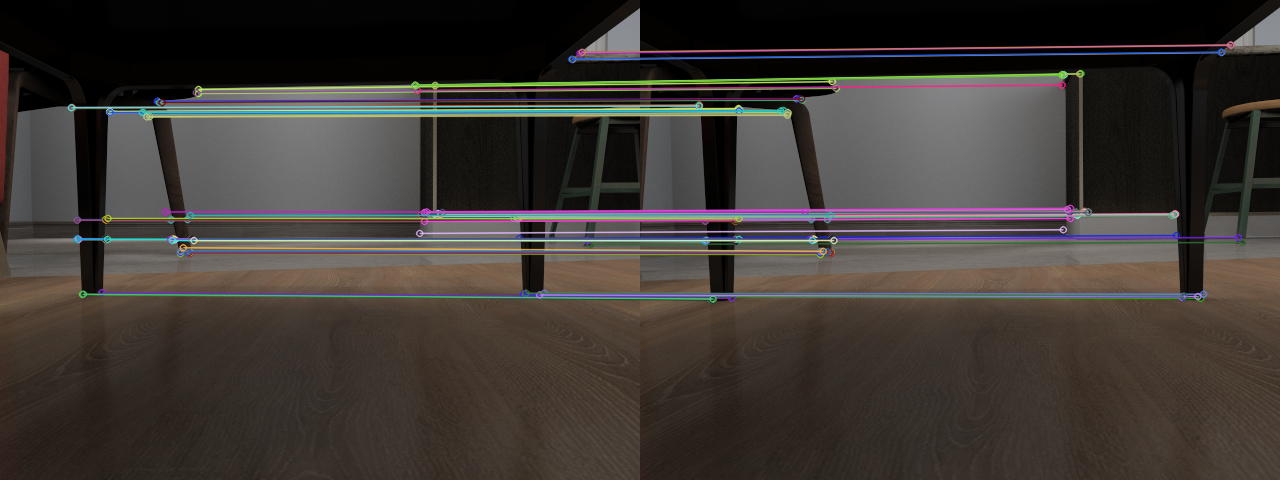

In [ ]:
img0, timestamp0 = load(0)
img1, timestamp1 = load(10)

img0_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=200)

kps0, des0 = orb.compute(img0, orb.detect(img0))
kps1, des1 = orb.compute(img1, orb.detect(img1))

bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf_matcher.match(des0, des1)

img_match = cv2.drawMatches(
    img0, kps0,
    img1, kps1,
    matches,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

cv2_imshow(img_match)